In [1]:
# Importing the required library
import pandas as pd
# Importing the dataset
chd = pd.read_csv("datasets/chd_data.csv")
# Printing the first 5 rows
chd.head()


,age,chd
0,20,0
1,23,0
2,24,0
3,25,1
4,25,0


Text(0.5, 1.0, 'Age vs. Coronary Heart Disease')

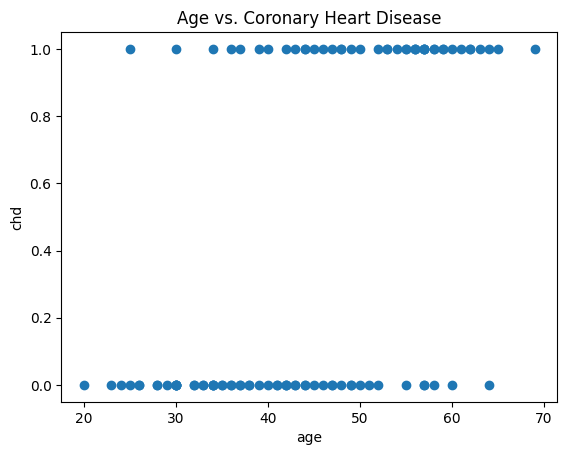

In [2]:
# The variable chd = 0 indicates the absence of coronary heart disease, whereas chd=1 indicates the presence of coronary heart disease.

# Importing the required library
import matplotlib.pyplot as plt
%matplotlib inline
# Plotting the 'chd' values against 'age' values
plt.scatter("age","chd",data=chd)
plt.xlabel("age")
plt.ylabel("chd")
plt.title("Age vs. Coronary Heart Disease")


In [3]:
# Importing the required class
from sklearn.model_selection import train_test_split
# Specifying the columns as predictor and target variable
predictors = ["age"]
target = "chd"
X = chd[predictors] # X contains the predictor values or input data 
y = chd[target] # y contains the target labels
# Spliting the data in training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# Checking the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (70, 1)
Shape of y_train: (70,)
Shape of X_test: (30, 1)
Shape of y_test: (30,)


In [4]:
# Building Model
# Importing the required class
from sklearn.linear_model import LogisticRegression
# Creating the object of the class LogisticRegression
model = LogisticRegression()
# Training the model using the training data
model.fit(X_train,y_train)
# Getting the intercept and the coefficients of the model
print("Intercept:",model.intercept_,"\nCoefficients:", model.coef_)


Intercept: [-5.6511192] 
Coefficients: [[0.11144141]]


In [5]:
# Creating a sample data
import numpy as np
test=np.array([29]).reshape(1,-1)
# Predicting the probabilities for each of the class labels
print("Predicted probability for class '0' and '1' respectively:", model.predict_proba(test))
# Predicting the final class label or target value
print("\nPredicted target i.e. 'chd' value:",model.predict(test))

Predicted probability for class '0' and '1' respectively: [[0.91828861 0.08171139]]

Predicted target i.e. 'chd' value: [0]


C:\Users\aravi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\aravi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [6]:
print("Accuracy score of the model on training data:", model.score(X_train, y_train))
print("Accuracy score of the model on test data:", model.score(X_test, y_test))


Accuracy score of the model on training data: 0.7428571428571429
Accuracy score of the model on test data: 0.7333333333333333


# Use of logistic regression on another problem by building  a model to classifying the credit risk for a loan applicant.

In [2]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Importing the dataset
credit_data = pd.read_csv("datasets/credit_risk.csv")

credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   over_draft              1000 non-null   object
 1   credit_usage            1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   current_balance         1000 non-null   int64 
 5   Average_Credit_Balance  1000 non-null   object
 6   employment              1000 non-null   object
 7   location                1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  cc_age                  1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [3]:
# Understanding the values the 'class' column (our target column in this analysis) can take
credit_data['class'].unique()


array(['good', 'bad'], dtype=object)

In [4]:
# Selecting predictors as all columns except the 'class' column
X = credit_data.columns.drop("class")
# Setting the target as the 'class' column
y = credit_data['class']

In [6]:
# Encoding all the features/predictor variables using the get_dummies method()
credit_data_encoded = pd.get_dummies(credit_data[X])
# Checking the shape of the input data
credit_data_encoded.shape
credit_data_encoded

,credit_usage,current_balance,location,residence_since,cc_age,existing_credits,num_dependents,over_draft_0<=X<200,over_draft_<0,over_draft_>=200,...,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_none,own_telephone_yes,foreign_worker_no,foreign_worker_yes
0,6,1169,4,4,67,2,1,False,True,False,...,True,False,False,True,False,False,False,True,False,True
1,48,5951,2,2,22,1,1,True,False,False,...,True,False,False,True,False,False,True,False,False,True
2,12,2096,2,3,49,1,2,False,False,False,...,True,False,False,False,False,True,True,False,False,True
3,42,7882,2,4,45,1,2,False,True,False,...,False,False,False,True,False,False,True,False,False,True
4,24,4870,3,4,53,2,2,False,True,False,...,False,False,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,False,False,False,...,True,False,False,False,False,True,True,False,False,True
996,30,3857,4,4,40,1,1,False,True,False,...,True,False,True,False,False,False,False,True,False,True
997,12,804,4,4,38,1,1,False,False,False,...,True,False,False,True,False,False,True,False,False,True
998,45,1845,4,4,23,1,1,False,True,False,...,False,False,False,True,False,False,False,True,False,True


In [7]:
# Splitting Credit Risk data into Training and testing data
# In this example, the data is split into training and test datasets in the ratio of 85:15.

# Importing the required module
from sklearn.model_selection import train_test_split
#splitting data into train and test datasets in 85:15 ratio
X_train,X_test,y_train,y_test = train_test_split(credit_data_encoded, y,test_size=0.15,random_state=100)
# Checking the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (850, 61)
Shape of y_train: (850,)
Shape of X_test: (150, 61)
Shape of y_test: (150,)


In [9]:
# Importing the required class.
from sklearn.linear_model import LogisticRegression
# Instantiating the required algorithm for model building.
model = LogisticRegression(solver='lbfgs', max_iter=10000)
# Building the model based on the training data.
model.fit(X_train,y_train)


LogisticRegression(max_iter=10000)

In [10]:
# Getting the accuracy on training data
train_accuracy = model.score(X_train,y_train)
print("Train accuracy = ", train_accuracy)
# Getting the accuracy on test data
test_accuracy = model.score(X_test,y_test)
print("Test accuracy = ", test_accuracy)

Train accuracy =  0.7988235294117647
Test accuracy =  0.7466666666666667


In [14]:
# Predicting targets based on the model built
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)
# Importing the required function
from sklearn.metrics import confusion_matrix
# Creating a confusion matrix on the training data
train_conf_matrix = confusion_matrix(y_train,train_predictions)
# Converting the train_conf_matrix into a DataFrame for better readability
pd.DataFrame(train_conf_matrix,columns=model.classes_,index=model.classes_)


,bad,good
bad,145,112
good,59,534


In [15]:
# Accuracy' can be computed from Confusion Matrix as well using the following expression:
# Accuracy = Number of Correct Predictions / Total Number of Predictions Made

# Calculating train accuracy from confusion matrix
train_correct_predictions = train_conf_matrix[0][0]+train_conf_matrix[1][1]
train_total_predictions = train_conf_matrix.sum()
train_accuracy = train_correct_predictions/train_total_predictions
print(train_accuracy)


0.7988235294117647


In [16]:
# Confusion matrix for the test data
test_conf_matrix = confusion_matrix(y_test,test_predictions)
pd.DataFrame(test_conf_matrix,columns=model.classes_,index=model.classes_)


,bad,good
bad,19,24
good,14,93


In [17]:
# Calculating test accuracy from confusion matrix
test_correct_predictions = test_conf_matrix[0][0]+test_conf_matrix[1][1]
total_predictions = test_conf_matrix.sum()
test_accuracy = test_correct_predictions/total_predictions
print(test_accuracy)


0.7466666666666667


In [18]:
# Precision: The precision for a class A indicates how accurate the model is in identifying class A. It is given by the below formula -
# precision(for class A) = Number of instances correctly predicted as A / Number of instances predicted as A


# Recall: The recall for a class A indicates how good the model is in fetching/retrieving instances of class A. It is given by the below formula -
# recall(for Class A) = Number of instances correctly predicted as A / Number of instances that are actually A

# F1-score: This metric is the harmonic mean of precision and recall and can indicate how good the model is in classifying instances of a particular class. It is defined as follows -
# Fscore(for class A) = 2((precision(A)*recall(A))/(precision(A) + recall(A)))

# Importing the required function
from sklearn.metrics import classification_report
# Generating the report and printing the same
print(classification_report(y_test,test_predictions))


              precision    recall  f1-score   support

         bad       0.58      0.44      0.50        43
        good       0.79      0.87      0.83       107

    accuracy                           0.75       150
   macro avg       0.69      0.66      0.67       150
weighted avg       0.73      0.75      0.74       150

